<a href="https://colab.research.google.com/github/sklepachh/compling/blob/main/%D0%A1%D0%BE%D1%84%D1%8C%D1%8F_%D0%9A%D0%BB%D0%B5%D0%BF%D0%B0%D1%87_%22workbook_distributional_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Курс "Компьютерная лингвистика" | НИУ ВШЭ Санкт-Петербург
(c) В.И. Фирсанова
```

# Практика: Введение в дистрибутивную семантику и знакомство с Google Colab

## Welcome to Google Colab

**Jupyter-ноутбук — интерактивная среда разработки**

Свойства Jupyter

* работа в ячейках
  * мгновенное отображение результата работы фрагментов кода
  * можно разбить выполнение кода на части
  * ячейки можно запускать в произвольном порядке

* код и текст
  * Jupyter поддерживает 2 типа ячеек - текстовые и кодовые
  * всю вашу работу можно документировать в текстовых ячейках

* визуализация
  * табличных данных
  * графиков
  * \+ красивый вывод данных

* область применения
  * машинное обучение
  * дата саенс
  * большие данные
  * научные вычисления
  * документация

**Интерфейс Google Colab — разновидность Jupyter-ноутбука**

Основные отличия

* интеграция с внешними сервисами
  * GitHub (можно напрямую скачивать и загружать ноутбуки)
  * Google Drive (там можно хранить данные, модели; нужно подключить свой диск к ноутбуку)
  * NEW! генеративный ИИ может помочь вам с написанием кода

* аппаратный ускоритель
  * GPU / TPU используется для машинного обучения и других ресурсоёмких вычислений
  * бесплатный доступ / недорогая подписка
  * см. меню `Runtime` - `Change runtime type`

**Основы работы с интерфейсом Google Colab**

***Открыть файл***

Горячие клавиши: `Ctrl + O` или `Cmd + O`

Опции:

* загружаем файл *.ipynb с локального диска
* открываем файл *.ipynb с Google-диска
* открываем файл *.ipynb с GitHub (URL, поиск пользователя)
* открываем из GitHub с помощью кнопки `Open in Colab`

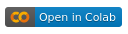

***Сохранить файл***

Горячие клавиши: сохранить на Google-диске `Ctrl + S` или `Cmd + S`

Возможности:

* сохранить копию в репозитории на GitHub (`File` - `Save a copy in GitHub`)
* сохранить GitHub Gist
* скачать *.ipynb (Jupyter-ноутбук)
* скачать *.py (скрипт на Python без деления на ячейки и текстовой информации)

***Внести изменения в файл***

Можно создать кодовую или текстовую ячейку.

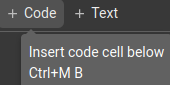

В кодовой ячейке можно ввести код на языке Python или команды shell.

Горячие клавиши:
- новая ячейка `Ctrl + M + B` или `Cmd + M + B`
- запустить ячейку `Shift + Enter`


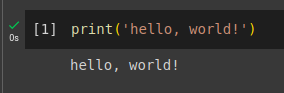

Ячейка содержит следующую информацию
- вывод данных
- время исполнения кода
- порядковый номер ячейки по ходу исполнения

In [ ]:
print('hello, world!')

hello, world!


Текстовые ячейки оформляются как Markdown.

См. [руководство по работе с Markdown](https://github.com/vifirsanova/compling/blob/main/markdown.md/).

Руководство можно использовать для оформления файла README.md в вашем репозитории на GitHub.

## Дистрибутивная семантика

[Efficient Estimation of Word Representations in
Vector Space (Mikolov et al., 2013)](https://arxiv.org/pdf/1301.3781.pdf)

### **Задача 1.** Обучаем эмбеддинги с Gensim

Что такое Gensim?

* библиотека Python с открытым исходным кодом
* области применения:
  * извлечение информации
  * обработка естественного языка
* задачи:
  * тематическое моделирование
  * индексирование документов
  * поиск сходства

При использовании любой библиотеки, нужно использовать ее [документацию](https://radimrehurek.com/gensim/index.html)

Загрузим корпус текстов Шекспира напрямую из GitHub с помощью команды shell `wget`

In [7]:
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-01-25 11:10:58--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-01-25 11:10:58 (20.1 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [8]:
# прописываем путь к файлу
file_path = 'input.txt'

# открываем файл для чтения ('r')
with open(file_path, 'r') as file:
    # записываем содержимое файла в переменную
    text_content = file.read()

# выведем на экран часть содержимого
text_content[:100]

'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'

Pre-processing / предобработка с помощью регулярных выражений и токенизатора NLTK

In [9]:
import re

def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()

    # удаляем все символы кроме букв
    text = re.sub(r'[^a-z\s]', '', text)

    # удаляем двойные пробелы
    text = re.sub(r'\s+', ' ', text).strip()

    return text

cleaned_text = clean_text(text_content)

# выведем на экран часть обработанного текста
cleaned_text[:100]

'first citizen before we proceed any further hear me speak all speak speak first citizen you are all '

In [11]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# токенизация по словам
tokens = word_tokenize(cleaned_text)

# выведем на экран несколько токенов
tokens[:10]

# дз1
  # извлечение стоп-слов
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
print("Токены без стоп-слов:", filtered_tokens)




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Токены без стоп-слов: ['first', 'citizen', 'proceed', 'hear', 'speak', 'speak', 'speak', 'first', 'citizen', 'resolved', 'rather', 'die', 'famish', 'resolved', 'resolved', 'first', 'citizen', 'first', 'know', 'caius', 'marcius', 'chief', 'enemy', 'people', 'knowt', 'knowt', 'first', 'citizen', 'let', 'us', 'kill', 'well', 'corn', 'price', 'ist', 'verdict', 'talking', 'ont', 'let', 'done', 'away', 'away', 'second', 'citizen', 'one', 'word', 'good', 'citizens', 'first', 'citizen', 'accounted', 'poor', 'citizens', 'patricians', 'good', 'authority', 'surfeits', 'would', 'relieve', 'us', 'would', 'yield', 'us', 'superfluity', 'wholesome', 'might', 'guess', 'relieved', 'us', 'humanely', 'think', 'dear', 'leanness', 'afflicts', 'us', 'object', 'misery', 'inventory', 'particularise', 'abundance', 'sufferance', 'gain', 'let', 'us', 'revenge', 'pikes', 'ere', 'become', 'rakes', 'gods', 'know', 'speak', 'hunger', 'bread', 'thirst', 'revenge', 'second', 'citizen', 'would', 'proceed', 'especially',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Обучение

`sentences` - итерируемый объект; список токенов либо список списков токенов (токенизированных предложений)

`vector_size` - размерность вектора

`window` - размер контекстного окна

`min_count` - если слово встречается реже, оно не попадает в нашу модель

`workers` - потоки (распараллеливание для ускорение работы)

In [13]:
from gensim.models import Word2Vec

# задаем параметры нашей модели
# пока не понимаю логику выбора параметров в этом исследовании, поэтому наобум
model = Word2Vec(sentences=[filtered_tokens], vector_size=90, window=8, min_count=1, workers=4)

In [18]:
# выведем результат обучения модели
model.wv['king']

array([ 3.0993388e-04,  2.4344164e-03, -1.4234134e-03,  3.3902135e-04,
       -5.0136447e-04, -1.6091732e-02,  3.2627941e-03,  2.2791972e-02,
       -1.1042583e-02, -1.7762078e-02, -3.6597378e-03, -1.5405690e-03,
       -9.7852349e-03,  1.2478584e-02,  2.5990354e-03, -7.2583784e-03,
       -4.4826027e-03, -1.3544309e-02,  2.0077960e-03,  3.9538628e-04,
       -1.4317234e-03, -5.3780270e-04,  4.8290375e-03, -1.4868095e-04,
        5.2706026e-03, -3.7946037e-03, -1.5596629e-04, -1.3292088e-02,
       -6.4670295e-03,  1.0294678e-02,  7.8338804e-03, -1.2208835e-02,
        2.7726702e-03, -1.1601759e-02, -5.0268029e-03,  1.0403274e-02,
       -9.2993993e-03,  3.2981781e-03,  7.1992739e-03, -1.4952275e-02,
       -8.3959708e-03, -8.6815543e-03, -1.3961735e-03,  1.2780608e-03,
        9.4627552e-03, -3.8420085e-03, -6.9499738e-03,  1.9297763e-03,
       -2.6639791e-03,  2.8018560e-04,  1.7777625e-03, -5.7056342e-05,
       -4.2708353e-03, -5.7700970e-03,  1.5772636e-03, -8.5923343e-04,
      

### **Задача 2.** Считаем сходство

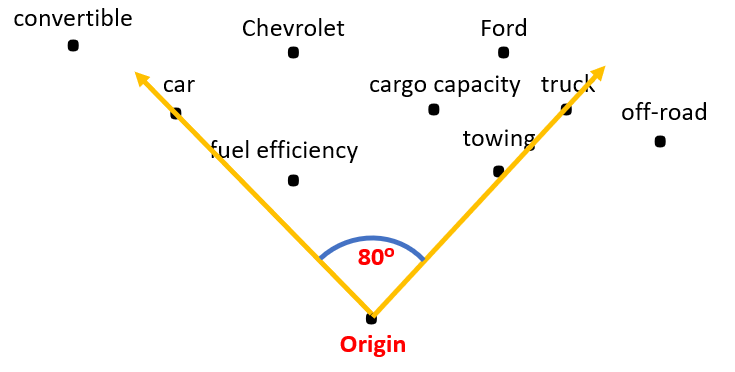

StandingFuture, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons

In [14]:
model.wv.most_similar(["king"])

[('successive', 0.35781651735305786),
 ('misty', 0.35284891724586487),
 ('flask', 0.3521724045276642),
 ('discase', 0.34381335973739624),
 ('undertaking', 0.3425265848636627),
 ('worshippd', 0.3364805579185486),
 ('afar', 0.33523616194725037),
 ('guarded', 0.3280627131462097),
 ('martial', 0.32320258021354675),
 ('sorry', 0.3192856013774872)]

для полного описания "короля" удобнее смотреть на токены без стоп-слов, а для построения гипотезы, где (синтаксически) появляется "king", в каком окружении - не удаляя стоп-слова


In [15]:
model.wv.similarity('king', 'queen')

0.024594463

у вектора положительное значение - слова ближе, что очевидно после избавления от стоп-слов


In [22]:
model.wv.similarity('daughter', 'brother')

0.05154216

меньше сходство

In [21]:
model.wv.similarity('king', 'prince')

0.027135193

In [ ]:
model.wv.doesnt_match(['king', 'prince', 'queen'])

'queen'

### **Задача 3.** Визуализация

Важный этап подготовки данных к визуализации - сокращение размерности вектора.

Мы обучили вектора размером 100. Теперь нужно превратить их в 2D.

Для этого используют разные алгоритмы, мы воспользуемся PCA (principal component analysis), статистической моделью, которая приводит всю информацию о полученном контенте к виду матрицы меньшей размерности, например, к виду таблицы (двухмерный массив), удобной для построения графиков и эксплораторного анализа данных.

Чтобы понять, как работает PCA, можно почитать [этот блог](https://builtin.com/data-science/step-step-explanation-principal-component-analysis).

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

from sklearn.decomposition import PCA

Создаем функцию для отрисовки графика с помощью PCA.

In [49]:
def pca_scatterplot(model, words=None, sample=0):
  word_vectors = [model.wv[w] for w in words]
  # сократить размерность векторов до 2D
  vectors_2d = PCA().fit_transform(word_vectors)
  # отрисовка изображения, задаем размер 12 на 10
  plt.figure(figsize=(12,10))
  # задаем цвет точек и ссылаемся на данные по осям x (0) и y (1)
  plt.scatter(vectors_2d[:,0], vectors_2d[:,1], c='r')
  # добавляем подписи к данным, проходимся по списку слов
  for i, word in enumerate(words):
    # соотносим слово с его двухмерным вектором
    plt.annotate(word, (vectors_2d[i, 0], vectors_2d[i, 1]))

Для визуализации давайте посмотрим, какие эпитеты Шекспир использует для описания королей и королев!

In [46]:
(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

(<gensim.models.word2vec.Word2Vec at 0x7c125a46a9b0>,
 ['smart',
  'handsome',
  'beautiful',
  'kind',
  'gentle',
  'old',
  'young',
  'prince',
  'princess',
  'lady',
  'king',
  'queen',
  'lord'])

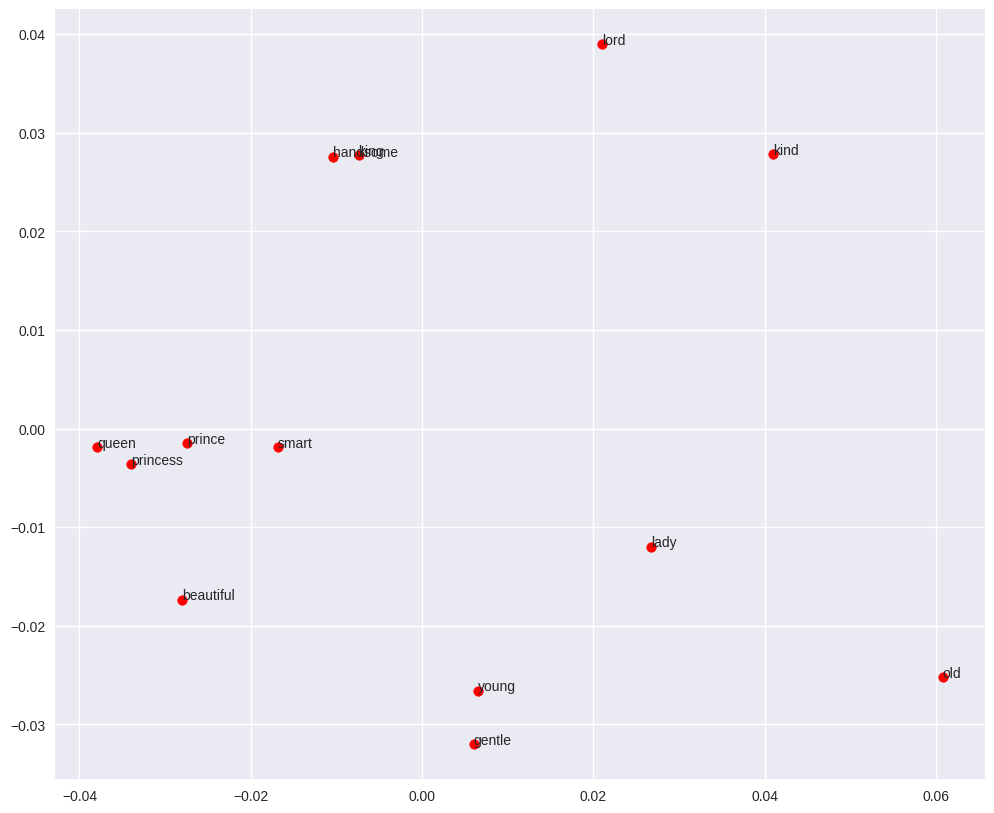

In [50]:
pca_scatterplot(model, ['smart', 'handsome', 'beautiful', 'kind', 'gentle', 'old', 'young',
                                'prince', 'princess', 'lady', 'king', 'queen', 'lord'])

## Домашнее задание

**Базовый уровень:**

* удалить стоп-слова в корпусе текстов Шескпира, лемматизировать корпус (достаточно выбрать что-то одно)
* заново обучить вектора
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках (можно просто перезапустить эти ячейки без изменений)
* представить выводы о проделанной работы: удалось ли вам обнаружить связи после удаления стоп-слов, лемматизации?

**Уверенный уровень:**

* обучить такую же модель Word2Vec на другом, более крупном корпусе
* найти сходства и различия между отдельными векторами
* визуализировать данные с помощью кода в заданных ячейках
* представить выводы о проделанной работы: удалось ли вам обнаружить какие-либо связи и отношения?

**Продвинутый уровень:**

* обучить FastText с помощью [туториала](https://radimrehurek.com/gensim/auto_examples/tutorials/run_fasttext.html)
* найти сходства и различия между отдельными векторами
* объяснить принцип работы FastText своими словами

**Опционально для любого уровня:**

* поиграть с визуализацией: поменять стиль, цвета графики
* выбрать другой набор слов для визуализации

